In [9]:
import pandas as pd

# Products needed
products = ["Boerenkaas", "Boter", "Melk, gemiddeld vet"]

# Read the data without headers and skip the first row
df = pd.read_excel('PivotGrid-2000_2018.xls', header=None)# skiprows=1)

# Assign column names
df.columns = ['Product', 'Unit'] + list(df.columns[2:])

# Fill down the 'Product' column
df['Product'].fillna(method='ffill', inplace=True)

# Keep only the rows where 'Unit' is not NaN
df = df[df['Unit'].notna()]

# Filter the DataFrame for the specified products
df_products = df[df['Product'].isin(products)]

# Set 'Product' as the index
df_products.set_index('Product', inplace=True)

# Drop the 'Unit' column
df_products.drop(columns='Unit', inplace=True)

# Transpose the DataFrame
df_products = df_products.transpose()

# Reset the index and add a 'time_index' column
df_products.reset_index(drop=True, inplace=True)
df_products['time_index'] = df_products.index

# Reorder columns to have 'time_index' first
df_products = df_products[['time_index'] + products]

# Convert data to numeric, coercing errors to NaN
df_products[products] = df_products[products].apply(pd.to_numeric, errors='coerce')


# Divide Butten en Mlik values by 100, 10p to convert  euro/100kg to euro/kg & euro/10kg
df_products['Boter'] /= 100
df_products['Melk, gemiddeld vet'] /= 10

# Output the DataFrame to CSV file
df_products.to_csv('output.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'PivotGrid-2000_2018.xls'

In [3]:
# Drop rows with any NaN values
df_4 = df_products.dropna().reset_index(drop=True)

# Create a new time_index column
df_4['time_index'] = df_4.index

# Reorder columns to have 'time_index' first
df_4 = df_4[['time_index'] + [col for col in df_4.columns if col != 'time_index']]

# Save the DataFrame to a CSV file
df_4.to_csv('output_melk.csv', index=False)

In [5]:
df_4

Product,time_index,Boerenkaas,Boter,"Melk, gemiddeld vet"
0,0,5.05,4.1450,3.666
1,1,5.05,4.2575,3.680
2,2,5.05,4.5500,3.747
3,3,5.05,5.3375,3.666
4,4,4.90,5.4700,3.545
...,...,...,...,...
223,223,3.95,3.0650,2.961
224,224,3.90,3.0100,2.969
225,225,4.05,2.9850,2.961
226,226,4.10,2.9750,3.047


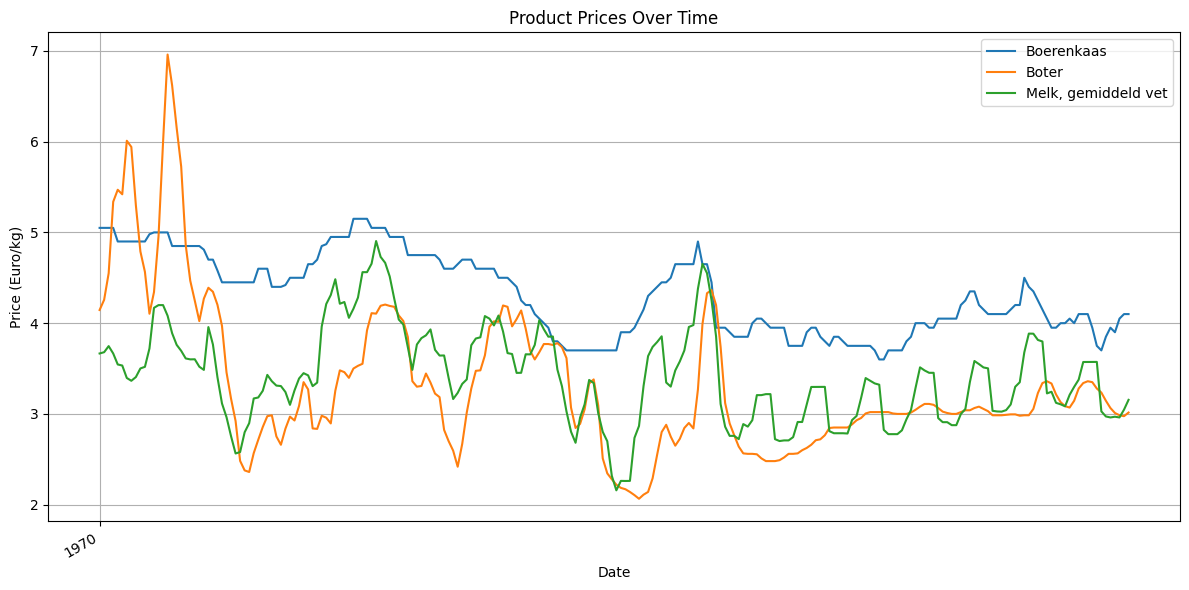

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_4 is your dataframe
# If it's not, replace df_4 with your actual dataframe name

# Convert time_index to datetime if it's not already
df_4['time_index'] = pd.to_datetime(df_4['time_index'])

# Set the time_index as the index of the dataframe
df_4.set_index('time_index', inplace=True)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each product
plt.plot(df_4.index, df_4['Boerenkaas'], label='Boerenkaas')
plt.plot(df_4.index, df_4['Boter'], label='Boter')
plt.plot(df_4.index, df_4['Melk, gemiddeld vet'], label='Melk, gemiddeld vet')

# Customize the plot
plt.title('Product Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Euro/kg)')
plt.legend()
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()